<a href="https://colab.research.google.com/github/ArupDukeBanerjee/time_series_forecasting/blob/master/Wind-Power-forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Getting packages

In [23]:
import numpy as np
import pandas as pd
import datetime
import os
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import missingno as msno
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [24]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [26]:
! cp kaggle.json ~/.kaggle/

In [27]:
! chmod 600 ~/.kaggle/kaggle.json

In [28]:
! kaggle datasets download -d theforcecoder/wind-power-forecasting

wind-power-forecasting.zip: Skipping, found more recently modified local copy (use --force to force download)


In [29]:
! unzip wind-power-forecasting.zip

Archive:  wind-power-forecasting.zip
replace Turbine_Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [30]:
data = pd.read_csv('Turbine_Data.csv')
data.head()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


###Data has missing values. need to check if the missing values are evenly distributed over entire time span.

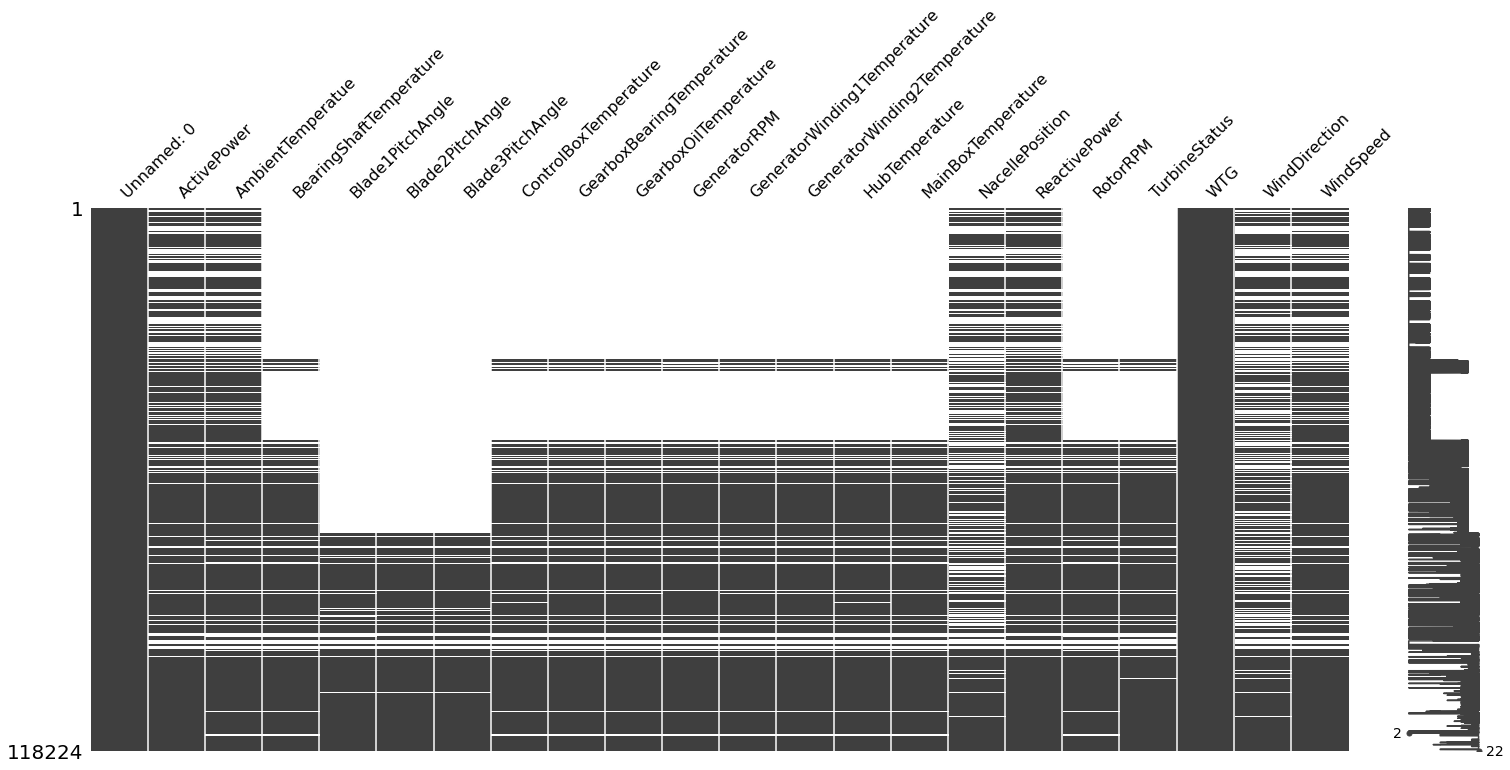

In [31]:
msno.matrix(data)

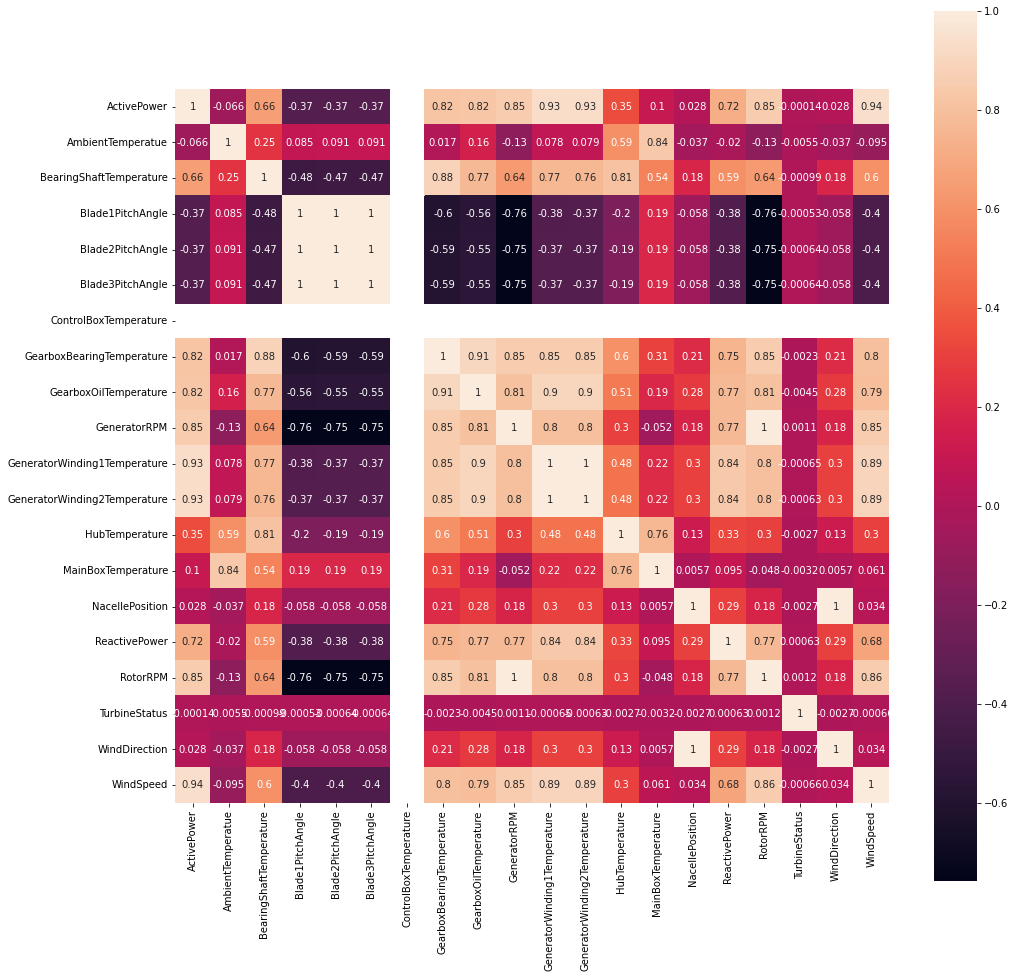

In [32]:
plt.subplots(figsize=(16, 16))
sns.heatmap(data.corr(), annot=True, square=True)
plt.show()

In [33]:
corrs=data.corr()
print(type(corrs))
corrs

<class 'pandas.core.frame.DataFrame'>


,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
ActivePower,1.000000,-0.065637,0.655400,-0.368997,-0.367978,-0.367978,NaN,0.818850,0.821921,0.849604,0.931390,0.932521,0.347363,0.101627,0.028108,0.719092,0.849069,-0.000135,0.028108,0.940390
AmbientTemperatue,-0.065637,1.000000,0.246505,0.085461,0.090904,0.090904,NaN,0.017216,0.162511,-0.130123,0.077859,0.078736,0.589729,0.836539,-0.037498,-0.020313,-0.129290,-0.005511,-0.037498,-0.095308
BearingShaftTemperature,0.655400,0.246505,1.000000,-0.475557,-0.466856,-0.466856,NaN,0.883344,0.772887,0.640947,0.765115,0.763926,0.809116,0.542104,0.183929,0.594546,0.640584,-0.000990,0.183929,0.596201
Blade1PitchAngle,-0.368997,0.085461,-0.475557,1.000000,0.997774,0.997774,NaN,-0.599178,-0.557949,-0.757056,-0.376102,-0.372369,-0.198583,0.194911,-0.058300,-0.381478,-0.757147,-0.000534,-0.058300,-0.403092
Blade2PitchAngle,-0.367978,0.090904,-0.466856,0.997774,1.000000,1.000000,NaN,-0.592103,-0.549792,-0.754325,-0.371057,-0.367451,-0.190296,0.190562,-0.057624,-0.379541,-0.754539,-0.000636,-0.057624,-0.402786
Blade3PitchAngle,-0.367978,0.090904,-0.466856,0.997774,1.000000,1.000000,NaN,-0.592103,-0.549792,-0.754325,-0.371057,-0.367451,-0.190296,0.190562,-0.057624,-0.379541,-0.754539,-0.000636,-0.057624,-0.402786
ControlBoxTemperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GearboxBearingTemperature,0.818850,0.017216,0.883344,-0.599178,-0.592103,-0.592103,NaN,1.000000,0.906020,0.850209,0.853024,0.851923,0.596065,0.307694,0.214486,0.751875,0.850795,-0.002314,0.214486,0.800433
GearboxOilTemperature,0.821921,0.162511,0.772887,-0.557949,-0.549792,-0.549792,NaN,0.906020,1.000000,0.806972,0.899693,0.898335,0.506648,0.190350,0.277619,0.770088,0.807776,-0.004536,0.277619,0.793140
GeneratorRPM,0.849604,-0.130123,0.640947,-0.757056,-0.754325,-0.754325,NaN,0.850209,0.806972,1.000000,0.796434,0.795223,0.303804,-0.052185,0.176964,0.768065,0.999723,0.001133,0.176964,0.854787


In [34]:
idxs=[]
for i, corr in enumerate(corrs['ActivePower']):
  if corr>0 and pd.notna(corr):
    idxs.append(i)
idxs

[0, 2, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19]

In [35]:
idxs = idxs[1:]
selected_features = data.corr()['ActivePower'][idxs]
selected_features

BearingShaftTemperature         0.655400
GearboxBearingTemperature       0.818850
GearboxOilTemperature           0.821921
GeneratorRPM                    0.849604
GeneratorWinding1Temperature    0.931390
GeneratorWinding2Temperature    0.932521
HubTemperature                  0.347363
MainBoxTemperature              0.101627
NacellePosition                 0.028108
ReactivePower                   0.719092
RotorRPM                        0.849069
WindDirection                   0.028108
WindSpeed                       0.940390
Name: ActivePower, dtype: float64

In [36]:
selected_features_2=selected_features.reset_index()
list_selected_features=list(selected_features_2['index'])

In [37]:
corr_among_features = data.corr()[list_selected_features].loc[list_selected_features]
corr_among_features

,BearingShaftTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,WindDirection,WindSpeed
BearingShaftTemperature,1.000000,0.883344,0.772887,0.640947,0.765115,0.763926,0.809116,0.542104,0.183929,0.594546,0.640584,0.183929,0.596201
GearboxBearingTemperature,0.883344,1.000000,0.906020,0.850209,0.853024,0.851923,0.596065,0.307694,0.214486,0.751875,0.850795,0.214486,0.800433
GearboxOilTemperature,0.772887,0.906020,1.000000,0.806972,0.899693,0.898335,0.506648,0.190350,0.277619,0.770088,0.807776,0.277619,0.793140
GeneratorRPM,0.640947,0.850209,0.806972,1.000000,0.796434,0.795223,0.303804,-0.052185,0.176964,0.768065,0.999723,0.176964,0.854787
GeneratorWinding1Temperature,0.765115,0.853024,0.899693,0.796434,1.000000,0.999959,0.481905,0.215955,0.298452,0.838461,0.797077,0.298452,0.894777
GeneratorWinding2Temperature,0.763926,0.851923,0.898335,0.795223,0.999959,1.000000,0.482003,0.217543,0.298708,0.839368,0.795776,0.298708,0.894834
HubTemperature,0.809116,0.596065,0.506648,0.303804,0.481905,0.482003,1.000000,0.761044,0.128150,0.325071,0.302916,0.128150,0.298537
MainBoxTemperature,0.542104,0.307694,0.190350,-0.052185,0.215955,0.217543,0.761044,1.000000,0.005701,0.095304,-0.047837,0.005701,0.060823
NacellePosition,0.183929,0.214486,0.277619,0.176964,0.298452,0.298708,0.128150,0.005701,1.000000,0.294038,0.176511,1.000000,0.034355
ReactivePower,0.594546,0.751875,0.770088,0.768065,0.838461,0.839368,0.325071,0.095304,0.294038,1.000000,0.767288,0.294038,0.680116


In [38]:
selected_features = selected_features.drop(labels=['GearboxOilTemperature', 'GeneratorWinding1Temperature', 'RotorRPM', 'NacellePosition'])
sel_feature_names = [idx for idx, val in selected_features.iteritems()]
#don't forget ActivePower
sel_feature_names.insert(0, 'ActivePower')
reduced_df = data[sel_feature_names]
print(f"The selected features are:\n{sel_feature_names}")

The selected features are:
['ActivePower', 'BearingShaftTemperature', 'GearboxBearingTemperature', 'GeneratorRPM', 'GeneratorWinding2Temperature', 'HubTemperature', 'MainBoxTemperature', 'ReactivePower', 'WindDirection', 'WindSpeed']


In [39]:
corr_among_features = data.corr()[sel_feature_names].loc[sel_feature_names]
corr_among_features

,ActivePower,BearingShaftTemperature,GearboxBearingTemperature,GeneratorRPM,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,ReactivePower,WindDirection,WindSpeed
ActivePower,1.000000,0.655400,0.818850,0.849604,0.932521,0.347363,0.101627,0.719092,0.028108,0.940390
BearingShaftTemperature,0.655400,1.000000,0.883344,0.640947,0.763926,0.809116,0.542104,0.594546,0.183929,0.596201
GearboxBearingTemperature,0.818850,0.883344,1.000000,0.850209,0.851923,0.596065,0.307694,0.751875,0.214486,0.800433
GeneratorRPM,0.849604,0.640947,0.850209,1.000000,0.795223,0.303804,-0.052185,0.768065,0.176964,0.854787
GeneratorWinding2Temperature,0.932521,0.763926,0.851923,0.795223,1.000000,0.482003,0.217543,0.839368,0.298708,0.894834
HubTemperature,0.347363,0.809116,0.596065,0.303804,0.482003,1.000000,0.761044,0.325071,0.128150,0.298537
MainBoxTemperature,0.101627,0.542104,0.307694,-0.052185,0.217543,0.761044,1.000000,0.095304,0.005701,0.060823
ReactivePower,0.719092,0.594546,0.751875,0.768065,0.839368,0.325071,0.095304,1.000000,0.294038,0.680116
WindDirection,0.028108,0.183929,0.214486,0.176964,0.298708,0.128150,0.005701,0.294038,1.000000,0.034355
WindSpeed,0.940390,0.596201,0.800433,0.854787,0.894834,0.298537,0.060823,0.680116,0.034355,1.000000


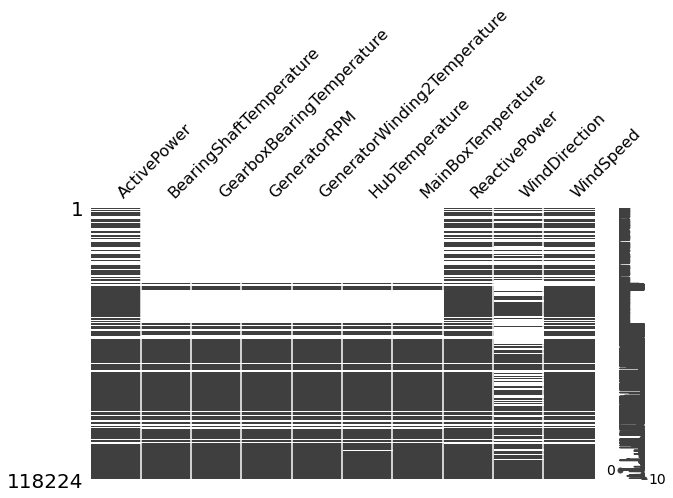

In [40]:
msno.matrix(reduced_df, figsize=(10,5))

In [41]:
reduced_df.shape[0]

118224

In [42]:
rng=pd.date_range('2017-12-31', periods=int(reduced_df.shape[0]), freq='10T')
time_df=pd.DataFrame(rng)
reduced_df = reduced_df.fillna(0).astype(float)
reduced_df1=pd.concat((time_df, reduced_df), axis=1)


In [43]:
reduced_df1.set_index(0, inplace=True)
reduced_df1.head()

,ActivePower,BearingShaftTemperature,GearboxBearingTemperature,GeneratorRPM,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,ReactivePower,WindDirection,WindSpeed
0,,,,,,,,,,
2017-12-31 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-31 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-31 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-31 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-31 00:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
reduced_df1.loc['2019-12-17 00:00:00':].isnull().sum()

ActivePower                     0
BearingShaftTemperature         0
GearboxBearingTemperature       0
GeneratorRPM                    0
GeneratorWinding2Temperature    0
HubTemperature                  0
MainBoxTemperature              0
ReactivePower                   0
WindDirection                   0
WindSpeed                       0
dtype: int64

In [45]:

df=reduced_df1.loc['2019-12-17':]
print(df.shape)
df.head()

(15120, 10)


,ActivePower,BearingShaftTemperature,GearboxBearingTemperature,GeneratorRPM,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,ReactivePower,WindDirection,WindSpeed
0,,,,,,,,,,
2019-12-17 00:00:00,245.469647,38.089795,59.392852,1029.793130,54.293575,31.001907,32.409722,50.060409,163.0,4.969920
2019-12-17 00:10:00,246.703719,38.087732,59.304792,1030.067422,54.011767,31.001907,32.359375,49.845629,163.0,5.012039
2019-12-17 00:20:00,235.295899,38.060932,59.257409,1029.932378,53.747796,31.001907,32.304688,47.636226,163.0,5.015685
2019-12-17 00:30:00,268.555670,38.015364,59.330999,1030.173420,53.608796,31.001907,32.237221,54.785349,166.0,5.265058
2019-12-17 00:40:00,188.746578,37.959578,58.942582,1029.905544,53.178426,31.001907,32.187500,39.334567,172.0,4.847444


In [48]:
scaler = MinMaxScaler()
scaler.fit(df.values)
data_scaled = scaler.transform(df.values)
print(data_scaled)

[[0.16057759 0.69345275 0.78378305 ... 0.45724593 0.45658263 0.48070408]
 [0.16127537 0.69341519 0.78262095 ... 0.45685814 0.45658263 0.48477793]
 [0.1548251  0.69292728 0.78199566 ... 0.45286892 0.45658263 0.48513059]
 ...
 [0.03353111 0.82766998 0.77120125 ... 0.37472375 0.49859944 0.32226445]
 [0.05689067 0.82551774 0.7681129  ... 0.38855814 0.53221289 0.31768264]
 [0.06060743 0.82347474 0.77307882 ... 0.39293048 0.56862745 0.33613123]]


In [25]:
test_split_days = 21 # 20%
val_split_days = 10 # around 10%

test_split_idx = len(df)-144*test_split_days
val_split_idx = test_split_idx-144*val_split_days

print("-- NN --")
train_data_nn = data_scaled[:val_split_idx]
val_data_nn = data_scaled[val_split_idx:test_split_idx]
test_data_nn = data_scaled[test_split_idx:]
print(f"Train data shape: {train_data_nn.shape}\nVal data shape: {val_data_nn.shape}\nTest data shape: {test_data_nn.shape}")

-- NN --
Train data shape: (10656, 10)
Val data shape: (1440, 10)
Test data shape: (3024, 10)


In [26]:
x_train_nn, y_train_nn = train_data_nn[:,1:], train_data_nn[:,0]
print(f"Train values shape: {x_train_nn.shape}\nTrain labels shape: {y_train_nn.shape}")

x_val_nn, y_val_nn = val_data_nn[:,1:], val_data_nn[:,0]
print(f"Val values shape: {x_val_nn.shape}\nVal labels shape: {y_val_nn.shape}")

x_test_nn, y_test_nn = test_data_nn[:,1:], test_data_nn[:,0]
print(f"Test values shape: {x_test_nn.shape}\nTest labels shape: {y_test_nn.shape}\n")

Train values shape: (10656, 9)
Train labels shape: (10656,)
Val values shape: (1440, 9)
Val labels shape: (1440,)
Test values shape: (3024, 9)
Test labels shape: (3024,)



In [27]:
x_train_reshaped, x_val_reshaped, x_test_reshaped = x_train_nn.reshape(-1, 144, 9), x_val_nn.reshape(-1, 144, 9), x_test_nn.reshape(-1, 144, 9)
y_train_reshaped, y_val_reshaped, y_test_reshaped = y_train_nn.reshape(-1, 144), y_val_nn.reshape(-1, 144), y_test_nn.reshape(-1, 144)

In [32]:
print(x_train_reshaped.shape, y_train_reshaped.shape, x_train_nn.shape, y_train_nn.shape)

(74, 144, 9) (74, 144) (10656, 9) (10656,)


In [57]:
## model parameters ##
depth = 2

# create the GRU model
model_gru = Sequential()

for i in range(1, depth+1):

    # we leave the standard arguments for GPU speeding up
    model_gru.add(GRU(units=64, input_shape=x_train_reshaped.shape[1:], return_sequences=True))
    model_gru.add(Dropout(0.2))   

# maps every neuron to a single output (predicted time series)
model_gru.add(Dense(units=1))

model_gru.summary()
#plot_model(model)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 144, 64)           14400     
                                                                 
 dropout_2 (Dropout)         (None, 144, 64)           0         
                                                                 
 gru_3 (GRU)                 (None, 144, 64)           24960     
                                                                 
 dropout_3 (Dropout)         (None, 144, 64)           0         
                                                                 
 dense_1 (Dense)             (None, 144, 1)            65        
                                                                 
Total params: 39,425
Trainable params: 39,425
Non-trainable params: 0
_________________________________________________________________


In [58]:
# training parameters
lr = 1e-3
loss = 'mape'
metrics = ['mae', 'mape']

# compile and additional parameters
patience = 30
min_delta_patience = 1e-7
checkpoint_path = 'best_gru.hdf5'

weights_save = ModelCheckpoint(checkpoint_path, save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, min_delta=min_delta_patience)
model_gru.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss=loss, metrics=metrics)

Epoch 1/100
74/74 [==============================] - 4s 20ms/step - loss: 116.5120 - mae: 0.2063 - mape: 116.5120 - val_loss: 130.7727 - val_mae: 0.1064 - val_mape: 130.7727
Epoch 2/100
74/74 [==============================] - 1s 10ms/step - loss: 104.4043 - mae: 0.1717 - mape: 104.4043 - val_loss: 159.5544 - val_mae: 0.1929 - val_mape: 159.5544
Epoch 3/100
74/74 [==============================] - 1s 11ms/step - loss: 70.3482 - mae: 0.1680 - mape: 70.3482 - val_loss: 101.7192 - val_mae: 0.1035 - val_mape: 101.7192
Epoch 4/100
74/74 [==============================] - 1s 10ms/step - loss: 74.8770 - mae: 0.1599 - mape: 74.8770 - val_loss: 112.9665 - val_mae: 0.1538 - val_mape: 112.9665
Epoch 5/100
74/74 [==============================] - 1s 10ms/step - loss: 66.5929 - mae: 0.1520 - mape: 66.5929 - val_loss: 89.7056 - val_mae: 0.1328 - val_mape: 89.7056
Epoch 6/100
74/74 [==============================] - 1s 10ms/step - loss: 58.9931 - mae: 0.1339 - mape: 58.9931 - val_loss: 79.0032 - val_

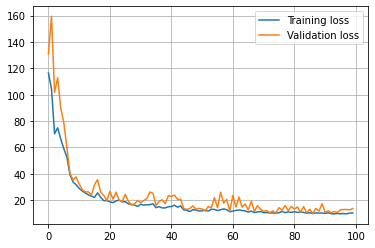

In [59]:
batch_size = 1 # this is done because we want 1 step predictions, therefore we need to update for every step
epochs = 100

history_gru = model_gru.fit(x_train_reshaped,
                    y_train_reshaped,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_val_reshaped, y_val_reshaped),
                    shuffle=False,
                    callbacks=[early_stopping, weights_save])

plt.plot(history_gru.history['loss'], label='Training loss')
plt.plot(history_gru.history['val_loss'], label = 'Validation loss')
plt.legend()
plt.grid()
plt.show()

model_gru.load_weights(checkpoint_path)

In [60]:
prediction_train_gru = model_gru.predict(x_train_reshaped)
prediction_test_gru = model_gru.predict(x_test_reshaped)
prediction_val_gru = model_gru.predict(x_val_reshaped)

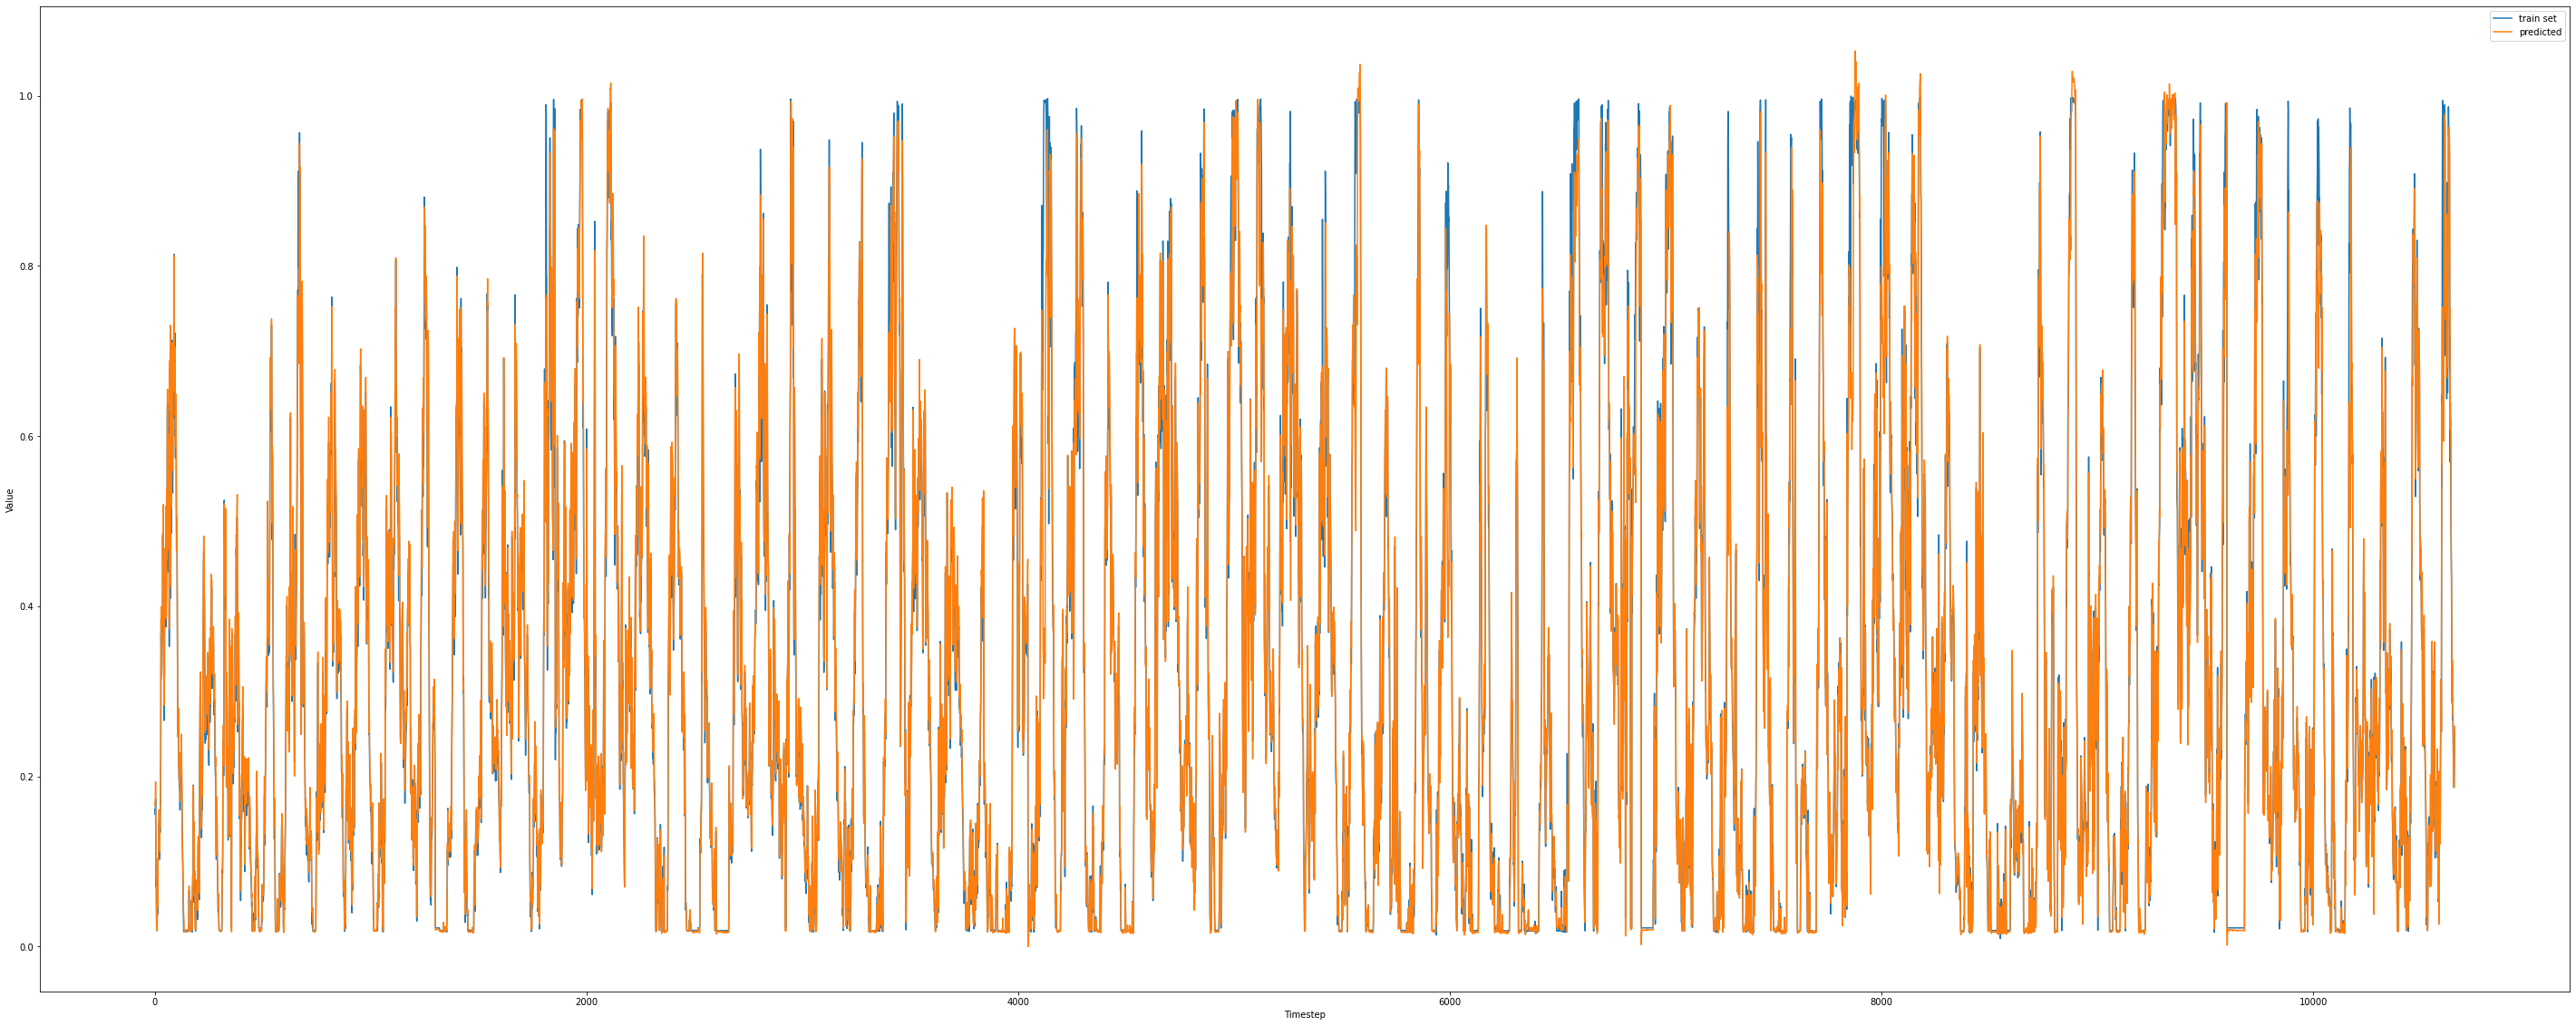

In [61]:

plt.figure(figsize=(50, 20))
plt.plot(y_train_nn, label="train set")
plt.plot(prediction_train_gru.flatten(), label="predicted")
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.legend()
plt.show()

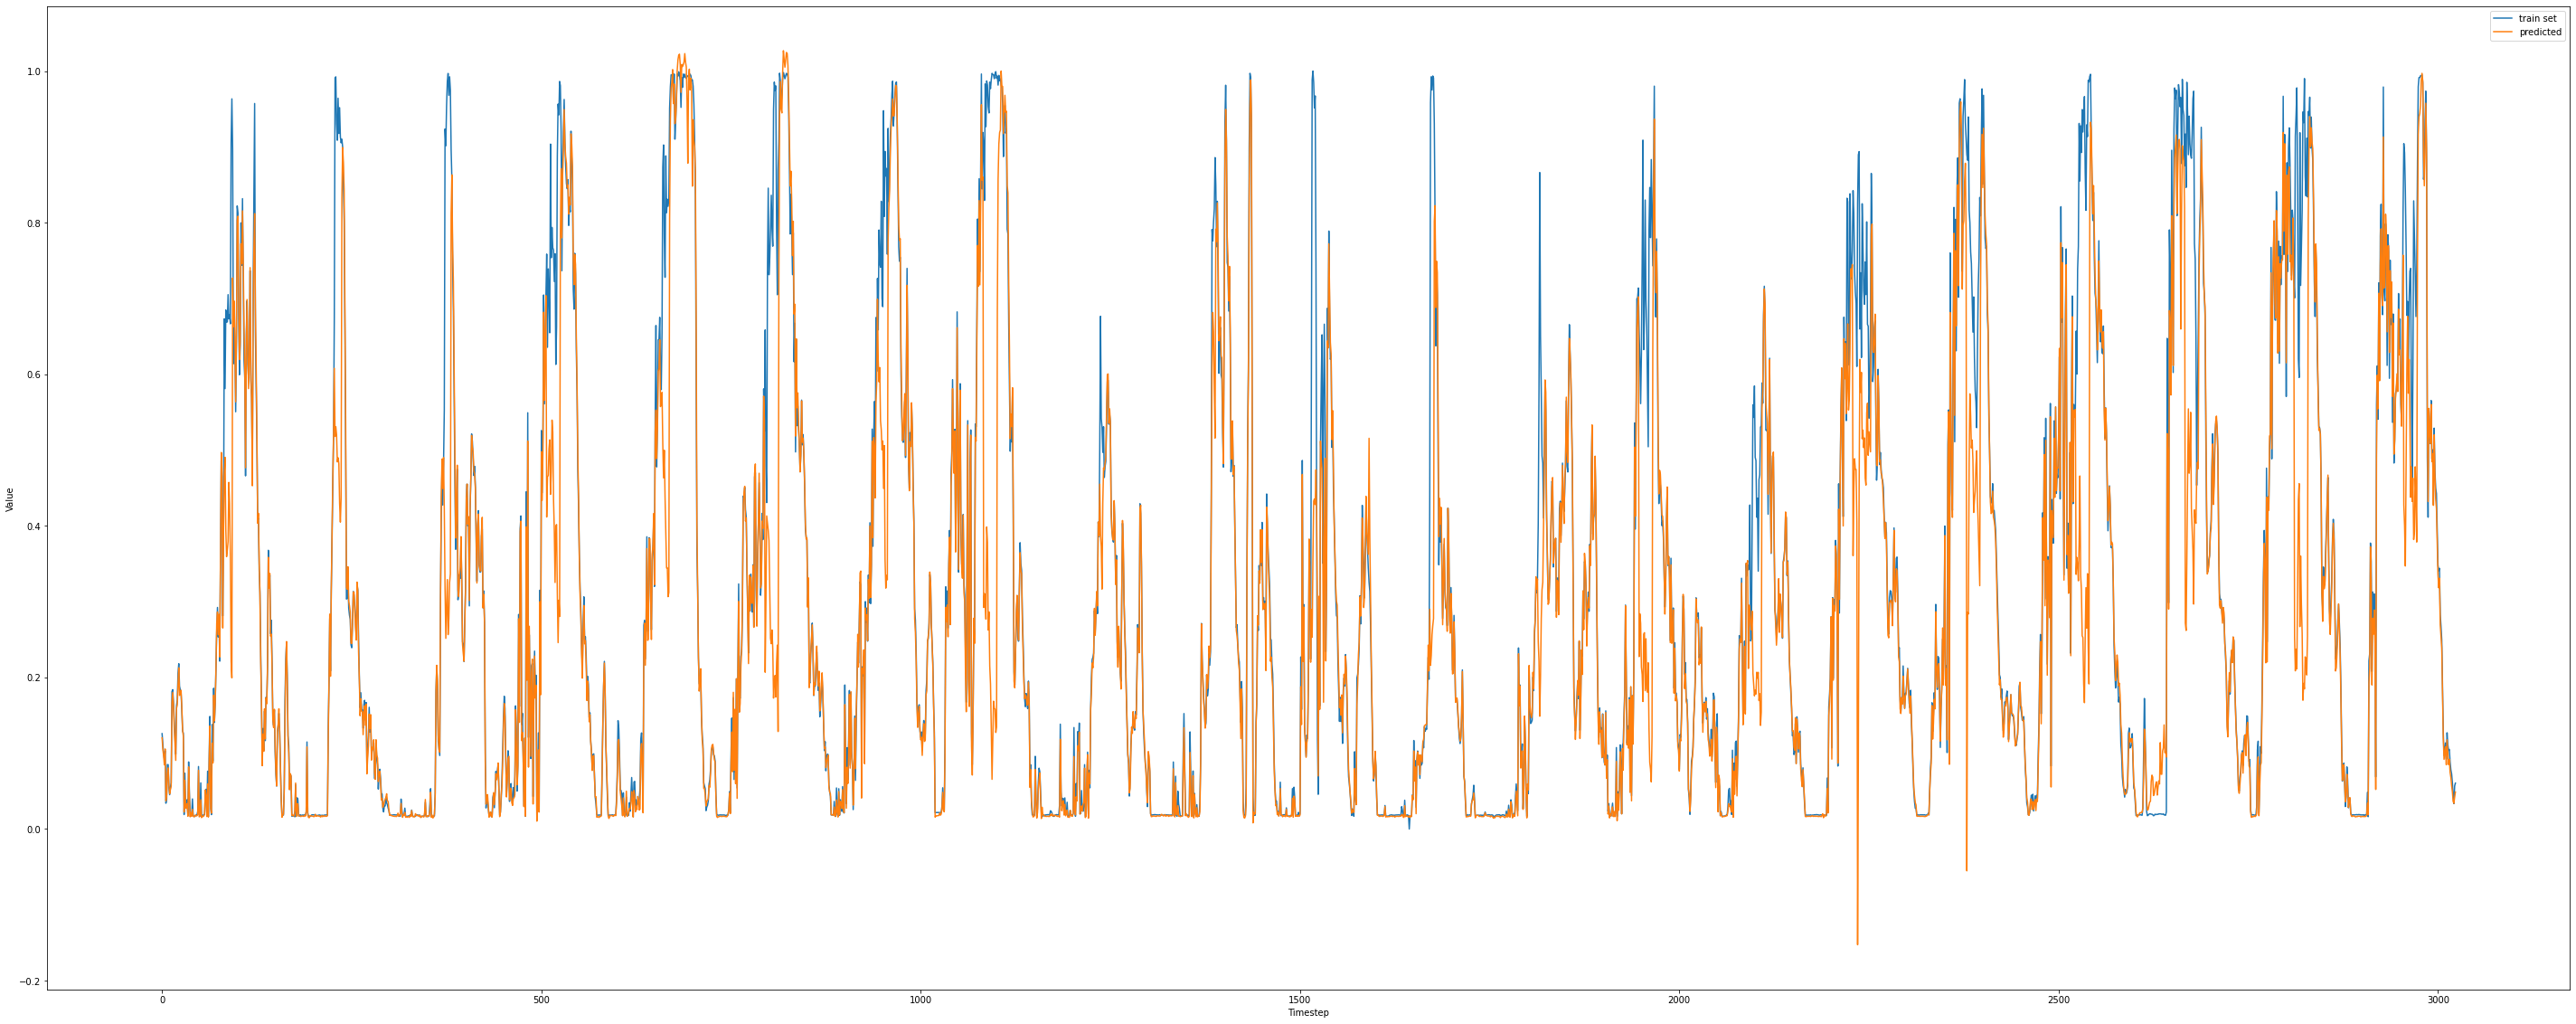

In [62]:
plt.figure(figsize=(50, 20))
plt.plot(y_test_nn, label="train set")
plt.plot(prediction_test_gru.flatten(), label="predicted")
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.legend()
plt.show()

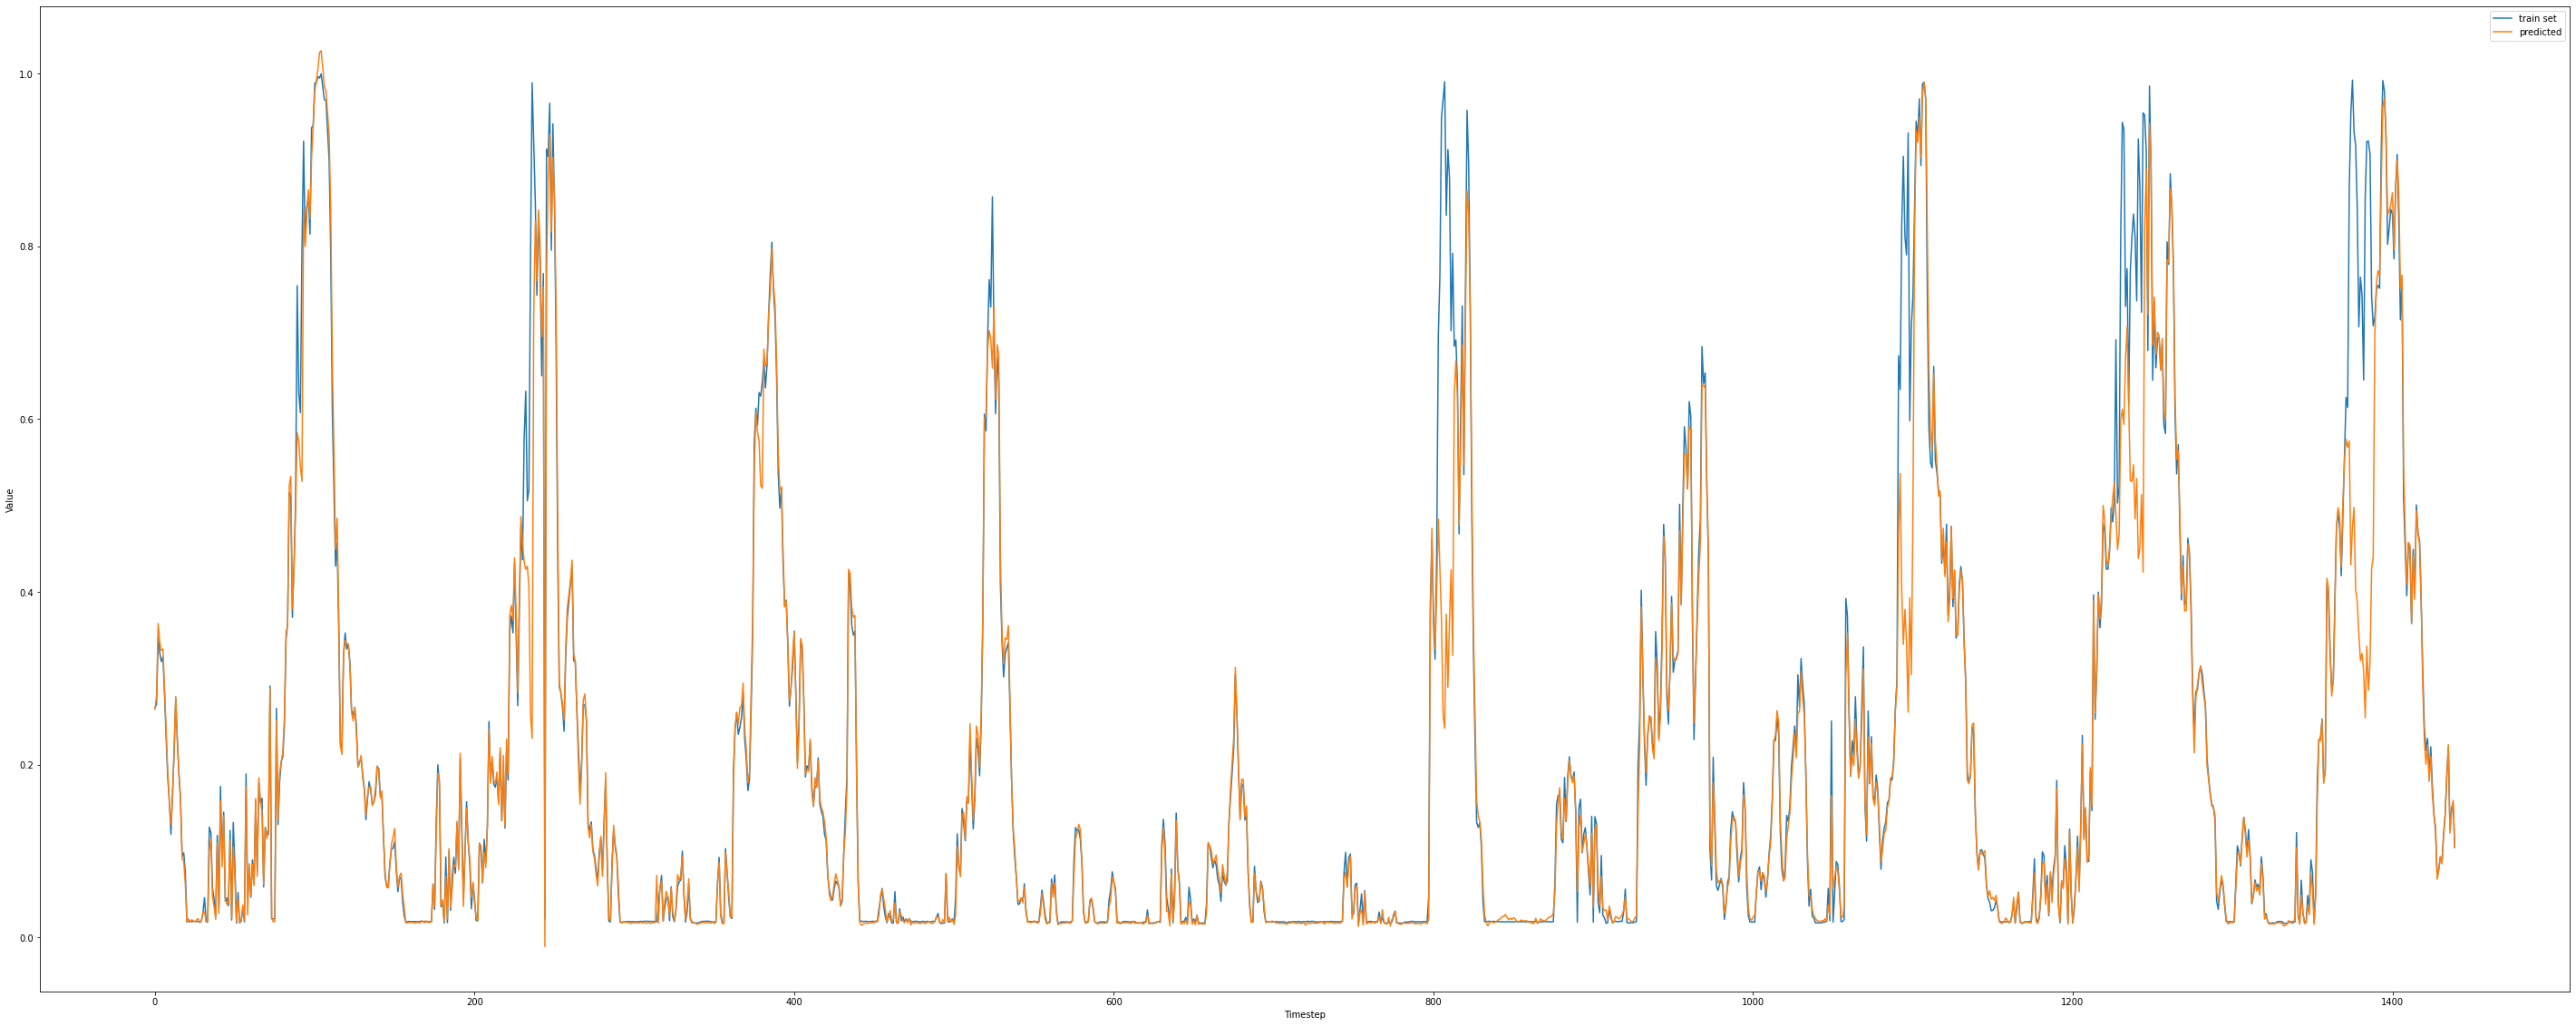

In [63]:

plt.figure(figsize=(50, 20))
plt.plot(y_val_nn, label="train set")
plt.plot(prediction_val_gru.flatten(), label="predicted")
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.legend()
plt.show()